# Doble péndulo
## Josué Juárez Morales
----

Sean los péndulos de masa $m_1$, $m_2$ y longitudes $l_1$, $l_2$, asi como sus coordenadas generalizadas $\theta_1$ y $\theta_2$, el Lagrangiano del sistema es

\begin{eqnarray}
L =\frac{1}{2}(m_1 + m_2) l_1^2 \dot{\theta}_1^2 &+&
	\frac{1}{2}m_2 l_2^2 \dot{\theta}_2^2 + m_2l_1l_2\dot{\theta}_1\dot{\theta}_2
	\cos(\theta_1 - \theta_2)\nonumber\\[3pt]
    &+&(m_1 + m_2) g l_1 \cos\theta_1 + m_2 g l_2\cos\theta_2.
\end{eqnarray}

Con el Langrangiano podemos obtener los momentos conjugados

\begin{equation}
p_i = \frac{\partial L}{\partial \dot q_i}
\end{equation}

\begin{eqnarray}
\displaystyle p_{\theta_1} &=& \frac{\partial L}{\partial \dot{\theta}_1} =
(m_1 + m_2) l_1^2 \dot{\theta}_1 + m_2 l_1 l_2 \dot{\theta}_2\cos(\theta_1-\theta_2),
\label{} \\[5pt]
\displaystyle p_{\theta_2} &=& \frac{\partial L}{\partial \dot{\theta}_2} =
m_2 l_2^2 \dot{\theta}_2 + m_2 l_1 l_2 \dot{\theta}_1\cos(\theta_1-\theta_2),
\label{}
\end{eqnarray}

asi el Hamiltoniano del sistema es

\begin{equation}
H(\theta_i, \dot \theta_i) = \sum_{i=1}^2 \dot{\theta}_i p_{\theta_i} - L,
\end{equation}

reescribiendolo en términos de $\theta_i$ y $p_{\theta_i}$ (ver desarrollo completo en https://diego.assencio.com/?index=e5ac36fcb129ce95a61f8e8ce0572dbf)

\begin{eqnarray}
H &=& \frac{m_2 l_2^2 p^2_{\theta_1} + (m_1 + m_2)l_1^2 p^2_{\theta_2}
- 2m_2 l_1 l_2 p_{\theta_1}p_{\theta_2}\cos(\theta_1-\theta_2)}
{2m_2 l_1^2l_2^2 \left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}\nonumber\\[3pt]
& & \quad\quad- (m_1 + m_2) g l_1 \cos\theta_1 - m_2 g l_2\cos\theta_2,
\label{}
\end{eqnarray}

y de las ecuaciones de Hamilton

\begin{equation}
\dot{q_i} = \frac{\partial H}{\partial p_i}
\end{equation}

\begin{equation}
\dot{p_i} = - \frac{\partial H}{\partial q_i}
\end{equation}

obtenemos las cuatro ecuaciones de movimiento del sistema

\begin{eqnarray}
\displaystyle
\dot{\theta}_1 &=& \;\;\frac{\partial H}{\partial p_{\theta_1}} &=&
\frac{l_2 p_{\theta_1} - l_1 p_{\theta_2}\cos(\theta_1-\theta_2)}
{l_1^2l_2\left[m_1 + m_2 \sin^2(\theta_1 - \theta_2)\right]}
\label{}
\\[5pt]
\displaystyle
\dot{\theta}_2 &=& \;\;\frac{\partial H}{\partial p_{\theta_2}} &=&
\frac{-m_2 l_2 p_{\theta_1}\cos(\theta_1-\theta_2) + (m_1 + m_2)l_1 p_{\theta_2}}
{m_2l_1 l_2^2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
\label{}
\\[5pt]
\dot{p}_{\theta_1} &=& -\frac{\partial H}{\partial \theta_1} &=&
-(m_1 + m_2)gl_1 \sin\theta_1 - h_1 + h_2\sin\left[2(\theta_1 - \theta_2)\right]
\label{}
\\[5pt]
\dot{p}_{\theta_2} &=& -\frac{\partial H}{\partial \theta_2} &=&
-m_2gl_2 \sin\theta_2 + h_1 - h_2\sin\left[2(\theta_1 - \theta_2)\right]
\label{}
\end{eqnarray}

siendo

\begin{equation}
h_1 = \frac{p_{\theta_1}p_{\theta_2}\sin(\theta_1 - \theta_2)}
{l_1l_2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
\end{equation}
\begin{equation}
h_2 = \frac{m_2 l_2^2 p^2_{\theta_1} + (m_1 + m_2)l_1^2 p^2_{\theta_2}
- 2 m_2 l_1l_2 p_{\theta_1}p_{\theta_2}\cos(\theta_1 - \theta_2)}
{2l_1^2l_2^2 \left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]^2}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate

In [2]:
def Q_Dot(Q,t):
    #regresa la derivada del vector Q
    #q_i --> theta_i
    
    theta1, theta2, p1, p2 = Q[0], Q[1], Q[2], Q[3]
    
    h1 = (p1*p2*np.sin(theta1 - theta2))/(l1*l2*(m1 + m2*(np.sin(theta1 - theta2))**2))
    h2 = (m2*(l2**2)*(p1**2) + (m1 + m2)*(l1**2)*(p2**2) - 2*m2*l1*l2*p1*p2*np.cos(theta1 - theta2))/(2*(l1**2)*(l2**2)*(m1 + m2*(np.sin(theta1 - theta2))**2))
    
    theta1_dot = (l2*p1 - l1*p2*np.cos(theta1 - theta2))/((l1**2)*l2*(m1 + m2*(np.sin(theta1 - theta2))**2))
    theta2_dot = (-m2*l2*p1*np.cos(theta1 - theta2) + (m1 + m2)*l1*p2)/(m2*l1*(l2**2)*(m1 + m2*(np.sin(theta1 - theta2))**2))
    p1_dot = -(m1 + m2)*g*l1*np.sin(theta1) - h1 + h2*np.sin(2*(theta1 - theta2))
    p2_dot = -m2*g*l2*np.sin(theta2) + h1 - h2*np.sin(2*(theta1 - theta2))
    
    return theta1_dot, theta2_dot, p1_dot, p2_dot

In [3]:
#definimos parámetros necesarios
l1 = 1
l2 = 1
m1 = 1
m2 = 1
g = 9.8
t = np.linspace(0, 15, num=100)
Q0 = [25, 60, 3, 6] #condiciones iniciales (aleatorias)

In [4]:
Q = integrate.odeint(Q_Dot, Q0, t)
Theta1 = Q[:,0]
Theta2 = Q[:,1]
P1 = Q[:,2]
P2 = Q[:,3]

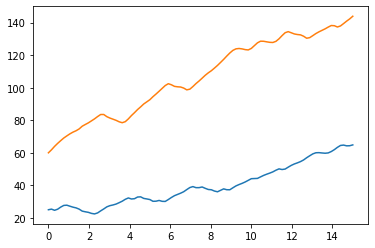

In [5]:
#gráfica de coordenadas vs tiempo
plt.plot(t, Theta1)
plt.plot(t, Theta2)

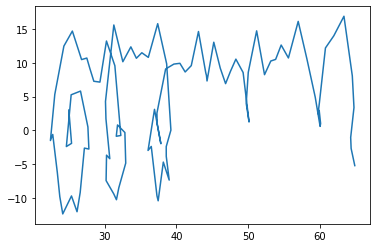

In [6]:
#gráficas del espacio fase
plt.plot(Theta1, P1)

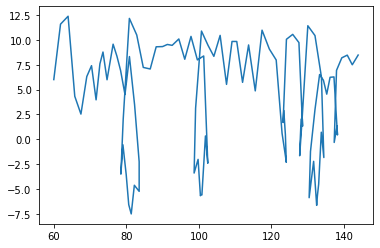

In [7]:
plt.plot(Theta2, P2)

Uno de los teoremas de conservación nos dice que si el Lagrangiano del sistema no depende explicitamente del tiempo entonces el Hamiltoniano se conserva

\begin{equation}
H = E = cte.
\end{equation}

Podemos calcular los valores de $E$ en los diferentes tiempos con los valores ya calculados.

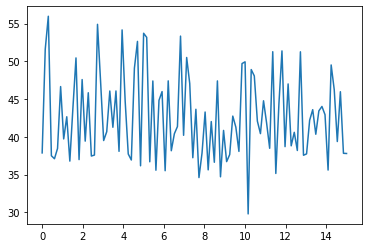

In [8]:
E = np.zeros((Q.shape[0], 1))
E[:,0] = (m2*(l2**2)*(Q[:,2]**2) + (m1 + m2)*(l1**2)*(Q[:,3]**2) - 2*m2*l1*l2*Q[:,2]*Q[:,3]*np.cos(Q[:,0] - Q[:,1]))/(2*(l1**2)*(l2**2)*(m1 + m2*(np.sin(Q[:,0] - Q[:,1]))**2)) - (m1 + m2)*g*l1*np.cos(Q[:,0]) - m2*g*l2*np.cos(Q[:,1])
plt.plot(t,E)

Computacionalmente la energía no se mantiene constante debido al error númerico al realizar las operaciones matemáticas.

Regresamos las coordenadas generalizadas a las cartesianas

In [9]:
x1 = l1*np.sin(Theta1)
y1 = -l1*np.cos(Theta1)
x2 = x1 + l2*np.sin(Theta2)
y2 = y1 - l2*np.cos(Theta1)

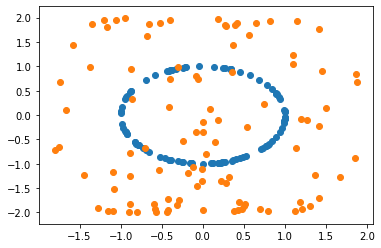

In [10]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)

Pendiente hacer para $n$ pendulos: arXiv:1910.12610v2